# M2.951_Bosch_Herrera_CarlesM_PRA1

## PRÀCTICA 1 - TCVD  - Feb24

In [1]:
# importem les llibreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy.stats as stats

In [2]:
# Eliminarem els possibles warnings

import warnings
warnings.filterwarnings('ignore')

### ANÀLISI EXPLORATÒRIA

In [3]:
# Carreguem les dades
train = pd.read_csv("C:/Users/kangu/Desktop/train.csv")
test  = pd.read_csv("C:/Users/kangu/Desktop/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()                        # no porta la variable objectiu que és Survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Dades faltants
train.isna().sum()

# Veiem que hi ha 3 variables que presenten valors faltants (Age, Cabin i Embarked)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# També podríem treure aquesta informació fent...
dades_faltants = train.apply(lambda x: x.isna().sum())
dades_faltants

# Aquesta darrera expressió en R és equivalent a fer ús de
# sapply(train, function(x) sum(is.na(x)))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Informació del nº de valors no nuls i tipus de variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
result = train.applymap(lambda x: type(x).__name__)
result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,int,int,int,str,str,float,int,int,str,float,float,str
1,int,int,int,str,str,float,int,int,str,float,str,str
2,int,int,int,str,str,float,int,int,str,float,float,str
3,int,int,int,str,str,float,int,int,str,float,str,str
4,int,int,int,str,str,float,int,int,str,float,float,str
...,...,...,...,...,...,...,...,...,...,...,...,...
886,int,int,int,str,str,float,int,int,str,float,float,str
887,int,int,int,str,str,float,int,int,str,float,str,str
888,int,int,int,str,str,float,int,int,str,float,float,str
889,int,int,int,str,str,float,int,int,str,float,str,str


In [10]:
# Aquesta darrera expressió en R seria equivalent a fer ús de
# sapply(train, function(x) class(x))

In [11]:
# Valors extrems o outliers. Això ho hauriem de fer per cada variable. Ho faré només pels les numèriques
# Pclass, Age, SibSp, Parch i Fare i comprovem que només hi ha outliers per la variable 'Fare'

In [12]:
# Analitzem els valor extrems per la variable 'Pclass'
import numpy as np
import scipy.stats as stats

# 'Pclass_base' serà la columna d'interès
Pclass_base = train['Pclass']

# Calcular els valors atípics
q1 = np.percentile(Pclass_base.dropna(), 25)
q3 = np.percentile(Pclass_base.dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Pclass = train['Pclass'][(train['Pclass'] < lower_bound) | (train['Pclass'] > upper_bound)]

# Comptar el nombre de valors atípics
num_outliers = len(outliers_Pclass)
print("Nombre de valors atípics per a Pclass:", outliers_Pclass)
  
# =====================================================
print("valors atípics per a Pclass:", outliers_Pclass.values)
print()
print("longitud:",outliers_Pclass)  
# =====================================================   
      
# Mostrem els outliers
print("Pclass_outliers")
print(outliers_Pclass)

Nombre de valors atípics per a Pclass: Series([], Name: Pclass, dtype: int64)
valors atípics per a Pclass: []

longitud: Series([], Name: Pclass, dtype: int64)
Pclass_outliers
Series([], Name: Pclass, dtype: int64)


In [13]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'Pclass'
q1 = np.percentile(train['Pclass'].dropna(), 25)
q3 = np.percentile(train['Pclass'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Pclass = train['Pclass'][(train['Pclass'] < lower_bound) | (train['Pclass'] > upper_bound)]

print("Valors atípics per a 'Pclass':", outliers_Pclass.values)
print("longitud",len(outliers_Pclass))

Valors atípics per a 'Pclass': []
longitud 0


In [14]:
# Analitzem els valor extrems per la variable 'Age'
import numpy as np
import scipy.stats as stats

# 'Age_base' serà la columna d'interès
Age_base = train['Age']

# Calcular els valors atípics
q1 = np.percentile(Age_base.dropna(), 25)
q3 = np.percentile(Age_base.dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Age = train['Age'][(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]

# Comptar el nombre de valors atípics
num_outliers = len(outliers_Age)
print("Nombre de valors atípics per a Age:", outliers_Age)

# =====================================================
print("valors atípics per a Age:", outliers_Age.values)
print()
print("longitud:",outliers_Age)  
# =====================================================   
      
# Mostrem els outliers
print("Age_outliers")
print(outliers_Age)

Nombre de valors atípics per a Age: 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
valors atípics per a Age: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70.  74. ]

longitud: 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
Age_outliers
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [15]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'Age'
q1 = np.percentile(train['Age'].dropna(), 25)
q3 = np.percentile(train['Age'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Age = train['Age'][(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]

print("Valors atípics per a 'Age':", outliers_Age.values)
print("longitud",len(outliers_Age))

Valors atípics per a 'Age': [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70.  74. ]
longitud 11


In [16]:
# Analitzem els valor extrems per la variable 'SibSp'
import numpy as np
import scipy.stats as stats

# 'SibSp_base' serà la columna d'interès
SibSp_base = train['SibSp']

# Calcular els valors atípics
q1 = np.percentile(SibSp_base, 25)
q3 = np.percentile(SibSp_base, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = SibSp_base[(SibSp_base < lower_bound) | (SibSp_base > upper_bound)]

# Comptar el nombre de valors atípics
num_outliers = len(outliers)
print("Nombre de valors atípics per a SibSp:", num_outliers)

# Mostrem els outliers
print("SibSp_outliers")
print(outliers)

Nombre de valors atípics per a SibSp: 46
SibSp_outliers
7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
792    8
813    4
819    3
824    4
846    8
850    4
863    8
Name: SibSp, dtype: int64


In [17]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'SibSp'
q1 = np.percentile(train['SibSp'].dropna(), 25)
q3 = np.percentile(train['SibSp'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_SibSp = train['SibSp'][(train['SibSp'] < lower_bound) | (train['SibSp'] > upper_bound)]

print("Valors atípics per a 'SibSp':", outliers_SibSp.values)

Valors atípics per a 'SibSp': [3 4 3 3 4 5 3 4 5 3 3 4 8 4 4 3 8 4 8 3 4 4 4 4 8 3 3 5 3 5 3 4 4 3 3 5 4
 3 4 8 4 3 4 8 4 8]


In [18]:
# Analitzem els valor extrems per la variable 'Parch'
import numpy as np
import scipy.stats as stats

# 'Parch_base' serà la columna d'interès
Parch_base = train['Parch']

# Calcular els valors atípics
q1 = np.percentile(Parch_base, 25)
q3 = np.percentile(Parch_base, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = Parch_base[(Parch_base < lower_bound) | (Parch_base > upper_bound)]

# Comptar el nombre de valors atípics
num_outliers = len(outliers)
print("Nombre de valors atípics per a Parch:", num_outliers)

# Mostrem els outliers
print("Parch_outliers")
print(outliers)

Nombre de valors atípics per a Parch: 213
Parch_outliers
7      1
8      2
10     1
13     5
16     1
      ..
871    1
879    1
880    1
885    5
888    2
Name: Parch, Length: 213, dtype: int64


In [19]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'Parch'
q1 = np.percentile(train['Parch'].dropna(), 25)
q3 = np.percentile(train['Parch'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Parch = train['Parch'][(train['Parch'] < lower_bound) | (train['Parch'] > upper_bound)]

print("Valors atípics per a 'Parch':", outliers_Parch.values)

Valors atípics per a 'Parch': [1 2 1 5 1 1 5 2 2 1 1 2 2 2 1 2 2 2 3 2 2 1 1 1 1 2 1 1 2 2 1 2 2 2 1 2 1
 1 2 1 4 1 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2
 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 4 1 1 2 2 2 2 2 1 1 1 2 2 1 1 2 2 3 4 1 2 1
 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 4 1 1 2 1 2 1 1 2 5 2 1 1
 1 2 1 5 2 1 1 1 2 1 6 1 2 1 2 1 1 1 1 1 1 1 3 2 1 1 1 1 2 1 2 3 1 2 1 2 2
 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 3 2 1 1 1 1 5 2]


In [20]:
# Analitzem els valor extrems per la variable 'Fare'
import numpy as np
import scipy.stats as stats

# 'fare_base' serà la columna d'interès
fare_base = train['Fare']

# Calcular els valors atípics
q1 = np.percentile(fare_base, 25)
q3 = np.percentile(fare_base, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = fare_base[(fare_base < lower_bound) | (fare_base > upper_bound)]

# Comptar el nombre de valors atípics
num_outliers = len(outliers)
print("Nombre de valors atípics per a Fare:", num_outliers)

# Mostrem els outliers
print("Fare_outliers")
print(outliers)

Nombre de valors atípics per a Fare: 116
Fare_outliers
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [21]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'Fare'
q1 = np.percentile(train['Fare'].dropna(), 25)
q3 = np.percentile(train['Fare'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Fare = train['Fare'][(train['Fare'] < lower_bound) | (train['Fare'] > upper_bound)]

print("Valors atípics per a 'Fare':", outliers_Fare.values)

Valors atípics per a 'Fare': [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55
  69.55   146.5208  69.55   113.275   76.2917  90.      83.475   90.
  79.2     86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85
  91.0792 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375
 164.8667 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5
 263.      75.25    69.3    135.6333  82.1708 211.5    227.525   73.5
 120.     113.275   90.     120.     263.      81.8583  89.1042  91.0792
  90.      78.2667 151.55    86.5    108.9     93.5    221.7792 106.425
  71.     106.425  110.8833 227.525   79.65   110.8833  79.65    79.2
  78.2667 153.4625  77.9583  69.3     76.7292  73.5    113.275  133.65
  73.5    512.3292  76.7292 211.3375 110.8833 227.525  151.55   227.525
 211.3375 512.3292  78.85   262.375   71.      86.5    120.      77.9583
 211.3375  79.2     69.55   120.      93.5     

In [22]:
# Identificació de valors llindae per a la variable 'Age'

In [23]:
# Valor llindar de la variable 'Age'
mean_age = train['Age'].mean(skipna=True)
std_age = train['Age'].std(skipna=True)

# Calcular el llindar
age_threshold = mean_age + 3 * std_age

print(age_threshold)

73.27860964406095


In [24]:
# Valor llindar de la variable 'Fare'
mean_fare = train['Fare'].mean(skipna=True)
std_fare = train['Fare'].std(skipna=True)

# Calcular el llindar
fare_threshold = mean_fare + 3 * std_fare

print(fare_threshold)

181.28449376011736


In [25]:
# Comprovació de punts per damunt del llindar per la variable 'Age'
# 'age_threshold' és el llindar calculat anteriorment
age_threshold = mean_age + 3 * std_age

# Suma de totes les edats, ignorant els valors NA
total_age = train['Age'].sum(skipna=True)
print('Suma de totes les edats:', total_age)

# Mitjana d'edat
mean_age = np.mean(train['Age'])
mean_age_rounded = round(mean_age, 2)
print('Mitjana de l\'edat:', mean_age_rounded)

# Comptar el nombre de valors per damunt del llindar, ignorant els valors NA
count_above_threshold = (train['Age'] > age_threshold).sum()

# Comptar el nombre de valors per damunt del llindar, ignorant els valors NA
count_above_threshold_no_na = (train['Age'] > age_threshold).sum(skipna=True)

print('Nombre de valors per damunt del llindar:', count_above_threshold)
print('Nombre de valors per damunt del llindar (ignorant NA):', count_above_threshold_no_na)

Suma de totes les edats: 21205.17
Mitjana de l'edat: 29.7
Nombre de valors per damunt del llindar: 2
Nombre de valors per damunt del llindar (ignorant NA): 2


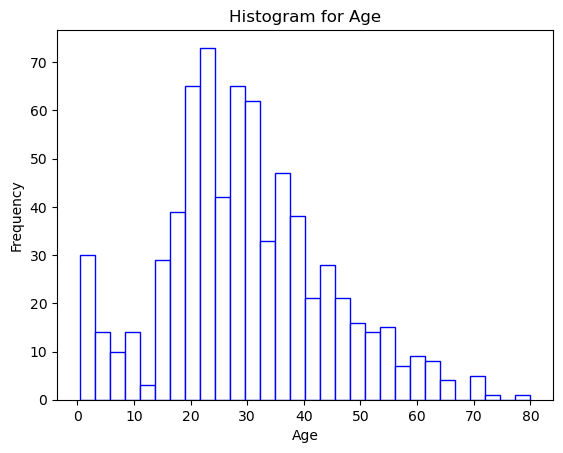

In [26]:
# Crear l'histograma per la variable 'Age'
plt.hist(train['Age'].dropna(), bins=30, edgecolor='blue', color='white')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

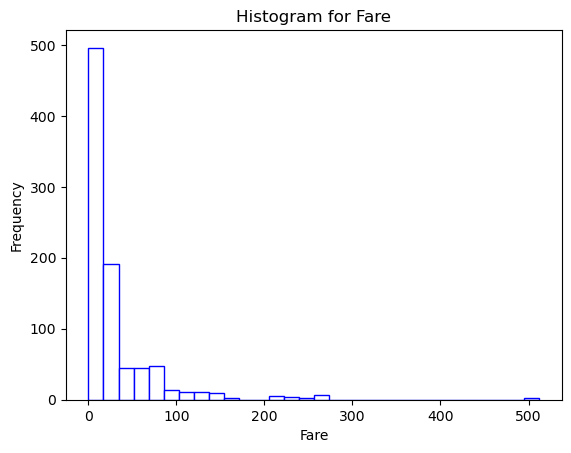

In [27]:
# Crear l'histograma per la variable 'Fare'
plt.hist(train['Fare'].dropna(), bins=30, edgecolor='blue', color='white')
plt.title('Histogram for Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'Age'
q1 = np.percentile(train['Age'].dropna(), 25)
q3 = np.percentile(train['Age'].dropna(), 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_age = train['Age'][(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]

print("Valors atípics per a 'Age':", outliers_age.values)

Valors atípics per a 'Age': [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70.  74. ]


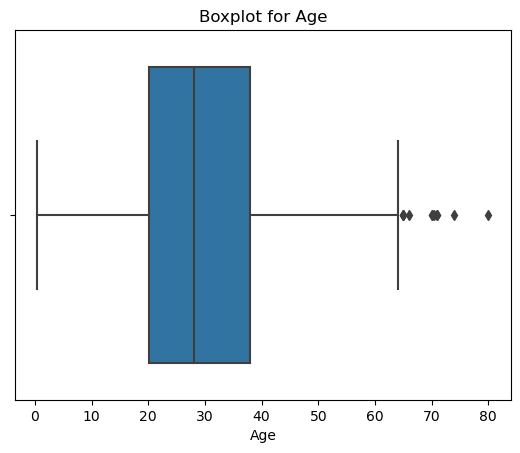

In [29]:
# Crear un boxplot horitzontal per a la columna 'Age'
sns.boxplot(x=train['Age'], orient='h')
plt.title('Boxplot for Age')
plt.show()

In [30]:
# Obtenir els valors atípics (outliers)

# Calcular els valors atípics per a la columna 'fare'
q1_fare = np.percentile(train['Fare'].dropna(), 25)
q3_fare = np.percentile(train['Fare'].dropna(), 75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare
outliers_fare = train['Fare'][(train['Fare'] < lower_bound_fare) | (train['Fare'] > upper_bound_fare)]

print('Valors atípics per a fare:', outliers_fare.values)

Valors atípics per a fare: [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55
  69.55   146.5208  69.55   113.275   76.2917  90.      83.475   90.
  79.2     86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85
  91.0792 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375
 164.8667 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5
 263.      75.25    69.3    135.6333  82.1708 211.5    227.525   73.5
 120.     113.275   90.     120.     263.      81.8583  89.1042  91.0792
  90.      78.2667 151.55    86.5    108.9     93.5    221.7792 106.425
  71.     106.425  110.8833 227.525   79.65   110.8833  79.65    79.2
  78.2667 153.4625  77.9583  69.3     76.7292  73.5    113.275  133.65
  73.5    512.3292  76.7292 211.3375 110.8833 227.525  151.55   227.525
 211.3375 512.3292  78.85   262.375   71.      86.5    120.      77.9583
 211.3375  79.2     69.55   120.      93.5     80

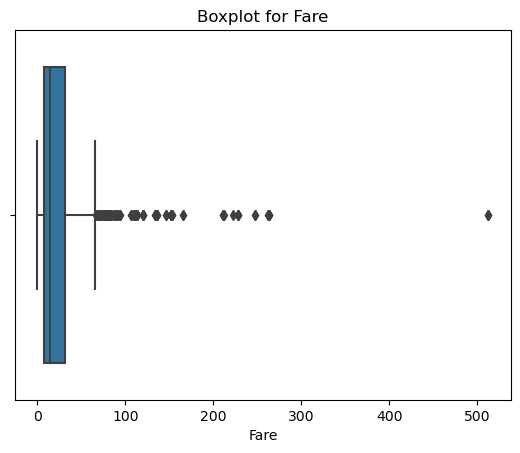

In [31]:
# Crear un boxplot horitzontal per a la columna 'Fare'
sns.boxplot(x=train['Fare'], orient='h')
plt.title('Boxplot for Fare')
plt.show()

### ANÀLISI ESTADÍSTICA

In [32]:
# Describe (estadistics de les variables)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Describe (variable objectiu)
train['Survived'].describe

<bound method NDFrame.describe of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

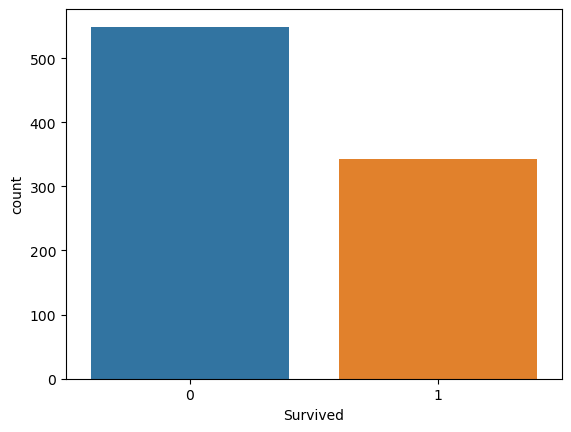

In [34]:
# Histograma de la gent que ha sobreviscut
sns.countplot(x='Survived', data=train)
plt.show()

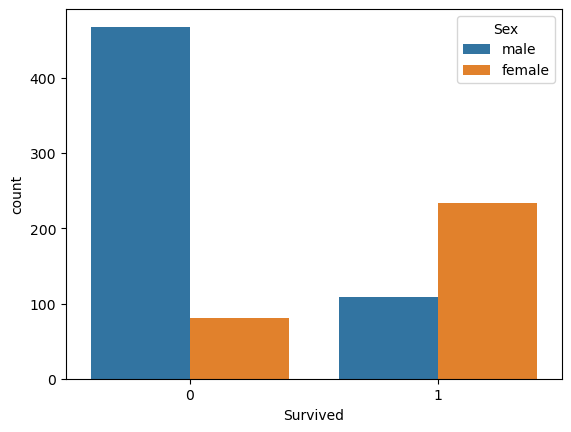

In [35]:
# Histograma de la gent que ha sobreviscut segons el sexe
sns.countplot(x='Survived', hue = 'Sex', data=train)
plt.show()

In [36]:
freq_m = train['Sex'].value_counts()
freq_m

male      577
female    314
Name: Sex, dtype: int64

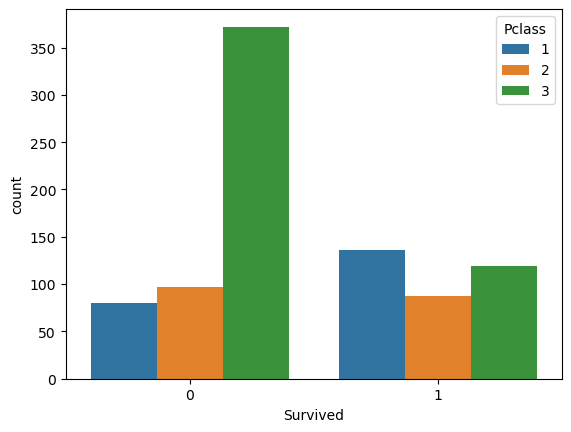

In [37]:
# Histograma de la gent que ha sobreviscut segons la classe
sns.countplot(x='Survived', hue = 'Pclass', data=train)
plt.show()

In [38]:
# Freqüència de aparició d'una variable (per exemple el sexe)
freq = train['Sex'].value_counts()
freq

male      577
female    314
Name: Sex, dtype: int64

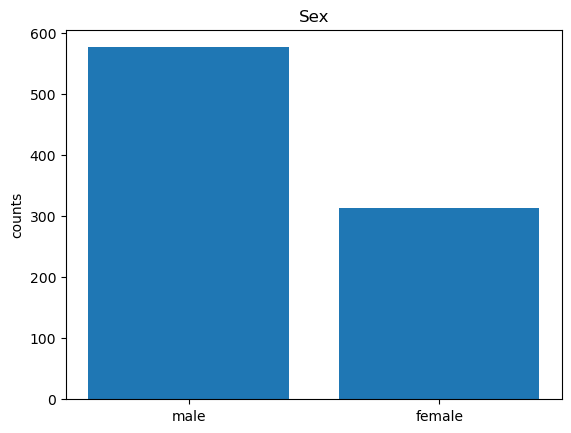

In [39]:
# Representació gràfica de la freqüència d'aparició d'una variable
plt.bar(freq.index.values, freq)
# plt.sticks(freq.index.values,('label 0','label 1'))
plt.ylabel ('counts')
plt.title('Sex')
plt.show()

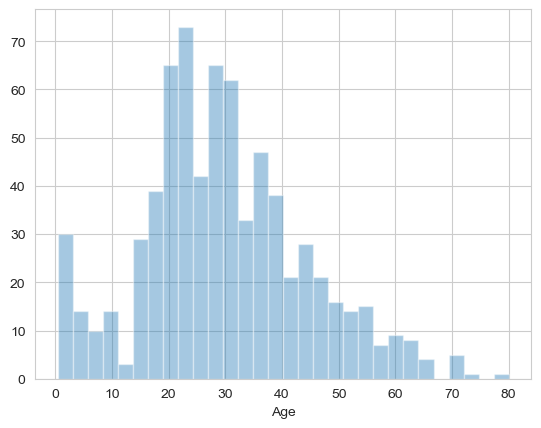

In [40]:
# Distribució de l'edat (no s'inclouen els valors faltants). Oisaré un grid perquè és vegi millor
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)
plt.show()

# Veiem que surten 3 grups: un de joves 0-20, un de gent més gran 20-50 i un darrer de gen més gran de 50 que és menys abundant.

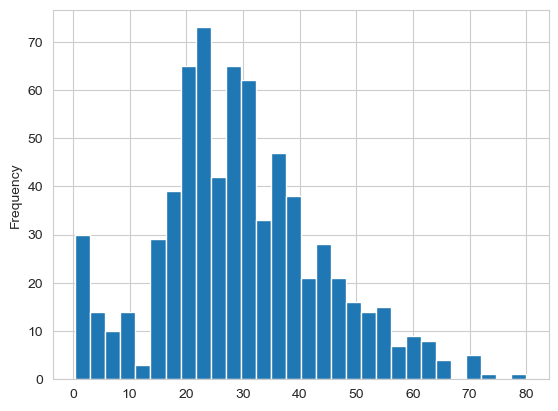

In [41]:
# Aquest gràfic es podria fer directament amb pandas obtenin un gràfic similar amb agrupacions de 10 en 10.
train['Age'].plot.hist(bins=30)                          # El bins=30 fa que les barres surtin més estretes
plt.show()

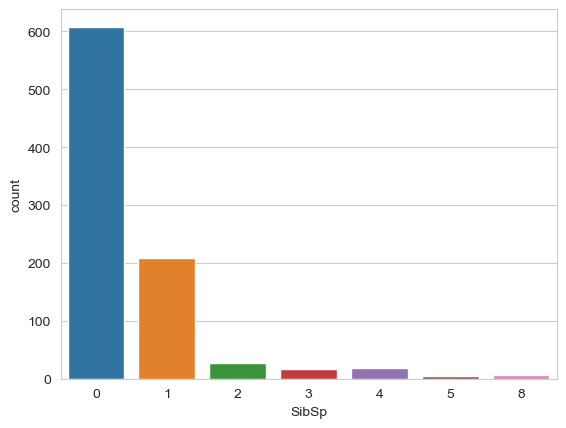

In [42]:
# Gràfic pel nº de germans o cònjuges
sns.set_style('whitegrid')
sns.countplot(x = 'SibSp' , data=train)
plt.show()

# Aqui veiem que la majoria de gent és soltera o ha vingut sola. Alguns venen amb la parella o amb més persones (families)

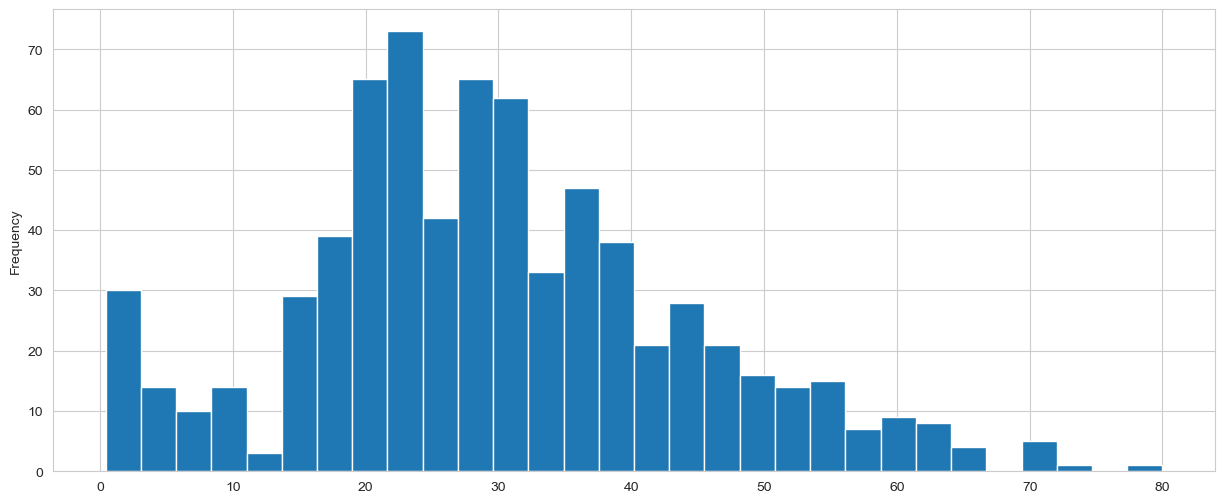

In [43]:
# Gràfic de la distribució dels bitllets (quan va pagar cada persona)
sns.set_style('whitegrid')
train['Age'].plot.hist(bins=30, figsize=(15,6)) 
plt.show()

In [44]:
# Selecció de dades d'interès. Caldra mirar quines de les variables tenen importància a l'hora de veure si ha sobreviscut o no.
# A la neteja de dades es veurà com tractar les dades faltants

In [45]:
# Creem el fitxer de requeriments1.txt per aquesta primer part de la pràctica

In [46]:
!pip3 freeze > requeriments1.txt

## A PARTIR D'AQUI VINDRIA LA SEGONA PART DE LA PRÀCTICA 2 - TCVD  - Feb24

## INDEX DE LA SEGONA PART: PRÀCTICA 2 - TCVD  - Feb24

### NETEJA DE DADES
- Valors faltants
- Imputacions
- Variables categòriques
- Eliminació les columnes no útils
- Dades preprocessades --> dades rellevants per fer les nostres prediccions

### PROVES DE NORMALITAT
- Test de Shapiro-Wilk
- Test de normalitat Q-Q plot

### PROVES D'HOMOGENEITAT
- Test d'Anderson-Darling
- Test de Fligner-Killeen

### PROVES ESTADÍSTIQUES
- Test de Wilcoxon
- Test de Kruskal-Wallis
- Correlació de Spearman

### CREACIÓ DEL MODEL
- Regressió logística
- Prediccions segons el model
- Avaluació del model
- Matriu de confusió
- Corba ROC
- Millores de la precissió: Canvis del thereshold
    
### LLIURAMENT DE DADES A KAGGLE
- Puntuació

### CREACIÓ DEL FITXER requeriments2.txt
- Instrucció: !pip3 freeze > requeriments2.txt

### LLIURAMENT DE LA PRÀCTICA COMPLETA
- Penjar codi a GitHub
- Penjar fitxer de requeriments a GitHub    

In [47]:
print ("finalització correcta de l'execució")

finalització correcta de l'execució
